
#Dicionário das Variáveis
CustomerID: Um ID único que identifica cada cliente.

Count: Um valor usado em relatórios/dashboards para somar o número de clientes em um conjunto filtrado.

Country: O país da residência principal do cliente.

State: O estado da residência principal do cliente.

City: A cidade da residência principal do cliente.

Zip Code: O código postal da residência principal do cliente.

Lat Long: A combinação de latitude e longitude da residência principal do cliente.

Latitude: A latitude da residência principal do cliente.

Longitude: A longitude da residência principal do cliente.

Gender: O gênero do cliente: Masculino, Feminino.

Senior Citizen: Indica se o cliente tem 65 anos ou mais: Sim, Não.

Partner: Indica se o cliente tem um parceiro: Sim, Não.

Dependents: Indica se o cliente vive com dependentes: Sim, Não. Dependentes podem ser filhos, pais, avós, etc.

Tenure Months: Indica o total de meses que o cliente está com a empresa até o final do trimestre especificado acima.

Phone Service: Indica se o cliente assina o serviço de telefone residencial com a empresa: Sim, Não.

Multiple Lines: Indica se o cliente assina várias linhas telefônicas com a empresa: Sim, Não.

Internet Service: Indica se o cliente assina o serviço de Internet com a empresa: Não, DSL, Fibra Óptica, Cabo.

Online Security: Indica se o cliente assina um serviço adicional de segurança online fornecido pela empresa: Sim, Não.

Online Backup: Indica se o cliente assina um serviço adicional de backup online fornecido pela empresa: Sim, Não.

Device Protection: Indica se o cliente assina um plano adicional de proteção de dispositivos para o equipamento de Internet fornecido pela empresa: Sim, Não.

Tech Support: Indica se o cliente assina um plano adicional de suporte técnico da empresa com tempos de espera reduzidos: Sim, Não.

Streaming TV: Indica se o cliente usa o serviço de Internet para transmitir programas de televisão de um provedor terceirizado: Sim, Não. A empresa não cobra uma taxa adicional por este serviço.

Streaming Movies: Indica se o cliente usa o serviço de Internet para transmitir filmes de um provedor terceirizado: Sim, Não. A empresa não cobra uma taxa adicional por este serviço.

Contract: Indica o tipo de contrato atual do cliente: Mês a Mês, Um Ano, Dois Anos.

Paperless Billing: Indica se o cliente optou pela fatura sem papel: Sim, Não.

Payment Method: Indica como o cliente paga sua conta: Débito Bancário, Cartão de Crédito, Cheque Enviado.

Monthly Charge: Indica o total mensal atual do cliente por todos os seus serviços da empresa.

Total Charges: Indica o total de cobranças do cliente, calculado até o final do trimestre especificado acima.

Churn Label: Sim = o cliente deixou a empresa neste trimestre. Não = o cliente permaneceu na empresa. Diretamente relacionado ao Churn Value.

CLTV: Valor do Tempo de Vida do Cliente. Um CLTV previsto é calculado usando fórmulas corporativas e dados existentes. Quanto maior o valor, mais valioso é o cliente. Clientes de alto valor devem ser monitorados quanto ao churn. **negrito**

#Importando o dataset e verificando sua estrutura

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_train = '/content/df_train.csv'
df = pd.read_csv(df_train)
df.head()
display(df.info())

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5986 non-null   object 
 1   Count              5986 non-null   int64  
 2   Country            5986 non-null   object 
 3   State              5986 non-null   object 
 4   City               5986 non-null   object 
 5   Zip Code           5986 non-null   int64  
 6   Lat Long           5986 non-null   object 
 7   Latitude           5986 non-null   float64
 8   Longitude          5986 non-null   float64
 9   Gender             5986 non-null   object 
 10  Senior Citizen     5986 non-null   object 
 11  Partner            5986 non-null   object 
 12  Dependents         5986 non-null   object 
 13  Tenure Months      5986 non-null   int64  
 14  Phone Service      5986 non-null   object 
 15  Multiple Lines     5986 non-null   object 
 16  Internet Service   5986 

None

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


#Separando as colunas categóricas e colunas numéricas

In [ ]:
df["Total Charges"] = df["Total Charges"].replace(" ", np.nan)
df["Total Charges"] = df["Total Charges"].astype(np.float64)
df["Total Charges"] = df["Total Charges"].fillna(df["Total Charges"].mean())
df["Lat Long"] = df["Lat Long"].str.replace(" ", "")
df["Lat Long"] = df["Lat Long"].str.split(",").str[0].astype(np.float64)
print(df.info())
print(df.head())

categorical_columns = df.select_dtypes(include=['object']).drop(columns=['CustomerID']).columns
print(df[categorical_columns].describe())
print(display(df[categorical_columns].head()))

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print(df[numeric_columns].describe())
print(display(df[numeric_columns].head()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5986 non-null   object 
 1   Count              5986 non-null   int64  
 2   Country            5986 non-null   object 
 3   State              5986 non-null   object 
 4   City               5986 non-null   object 
 5   Zip Code           5986 non-null   int64  
 6   Lat Long           5986 non-null   float64
 7   Latitude           5986 non-null   float64
 8   Longitude          5986 non-null   float64
 9   Gender             5986 non-null   object 
 10  Senior Citizen     5986 non-null   object 
 11  Partner            5986 non-null   object 
 12  Dependents         5986 non-null   object 
 13  Tenure Months      5986 non-null   int64  
 14  Phone Service      5986 non-null   object 
 15  Multiple Lines     5986 non-null   object 
 16  Internet Service   5986 

,Country,State,City,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label
0,United States,California,Los Angeles,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,United States,California,Dulzura,Female,No,No,No,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),No
2,United States,California,San Jose,Male,Yes,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),No
3,United States,California,Los Angeles,Female,Yes,Yes,No,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),No
4,United States,California,Tahoma,Female,Yes,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,Yes


None
        Count      Zip Code     Lat Long     Latitude    Longitude  \
count  5986.0   5986.000000  5986.000000  5986.000000  5986.000000   
mean      1.0  93521.009522    36.291181    36.291181  -119.806998   
std       0.0   1871.036207     2.460504     2.460504     2.156244   
min       1.0  90001.000000    32.555828    32.555828  -124.301372   
25%       1.0  92091.000000    34.030915    34.030915  -121.822224   
50%       1.0  93554.500000    36.413825    36.413825  -119.728910   
75%       1.0  95359.500000    38.240769    38.240769  -118.046695   
max       1.0  96161.000000    41.962127    41.962127  -114.192901   

       Tenure Months  Monthly Charges  Total Charges         CLTV  
count    5986.000000      5986.000000    5986.000000  5986.000000  
mean       32.302873        64.451938    2270.918912  4398.067658  
std        24.555068        30.126750    2258.517121  1186.907923  
min         0.000000        18.250000      18.800000  2003.000000  
25%         9.000000    

,Count,Zip Code,Lat Long,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,CLTV
0,1,90001,33.973616,33.973616,-118.249020,1,29.85,29.85,3964
1,1,91917,32.622999,32.622999,-116.687855,38,66.15,2522.40,4933
2,1,95130,37.277592,37.277592,-121.986477,64,24.40,1548.65,4772
3,1,90023,34.017697,34.017697,-118.200577,72,84.10,6129.65,4999
4,1,96142,39.061227,39.061227,-120.179546,42,84.65,3541.35,4871


None


# Verificando a distribuição da coluna Churn Labels

<ipython-input-3-921ffb840fa0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn Label', data=df, palette='viridis')


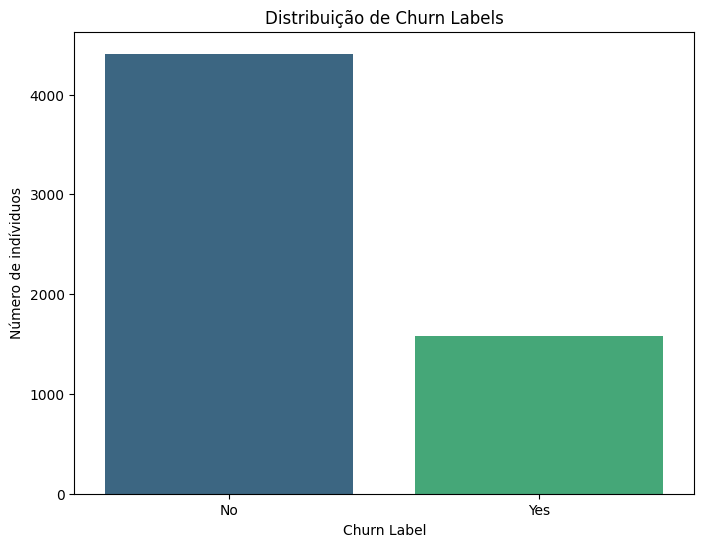

Churn Labels
Churn Label
No     4409
Yes    1577
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn Label', data=df, palette='viridis')

plt.title('Distribuição de Churn Labels')
plt.xlabel('Churn Label')
plt.ylabel('Número de indíviduos')
plt.show()

churn_counts = df['Churn Label'].value_counts()

print("Churn Labels")
print(churn_counts)

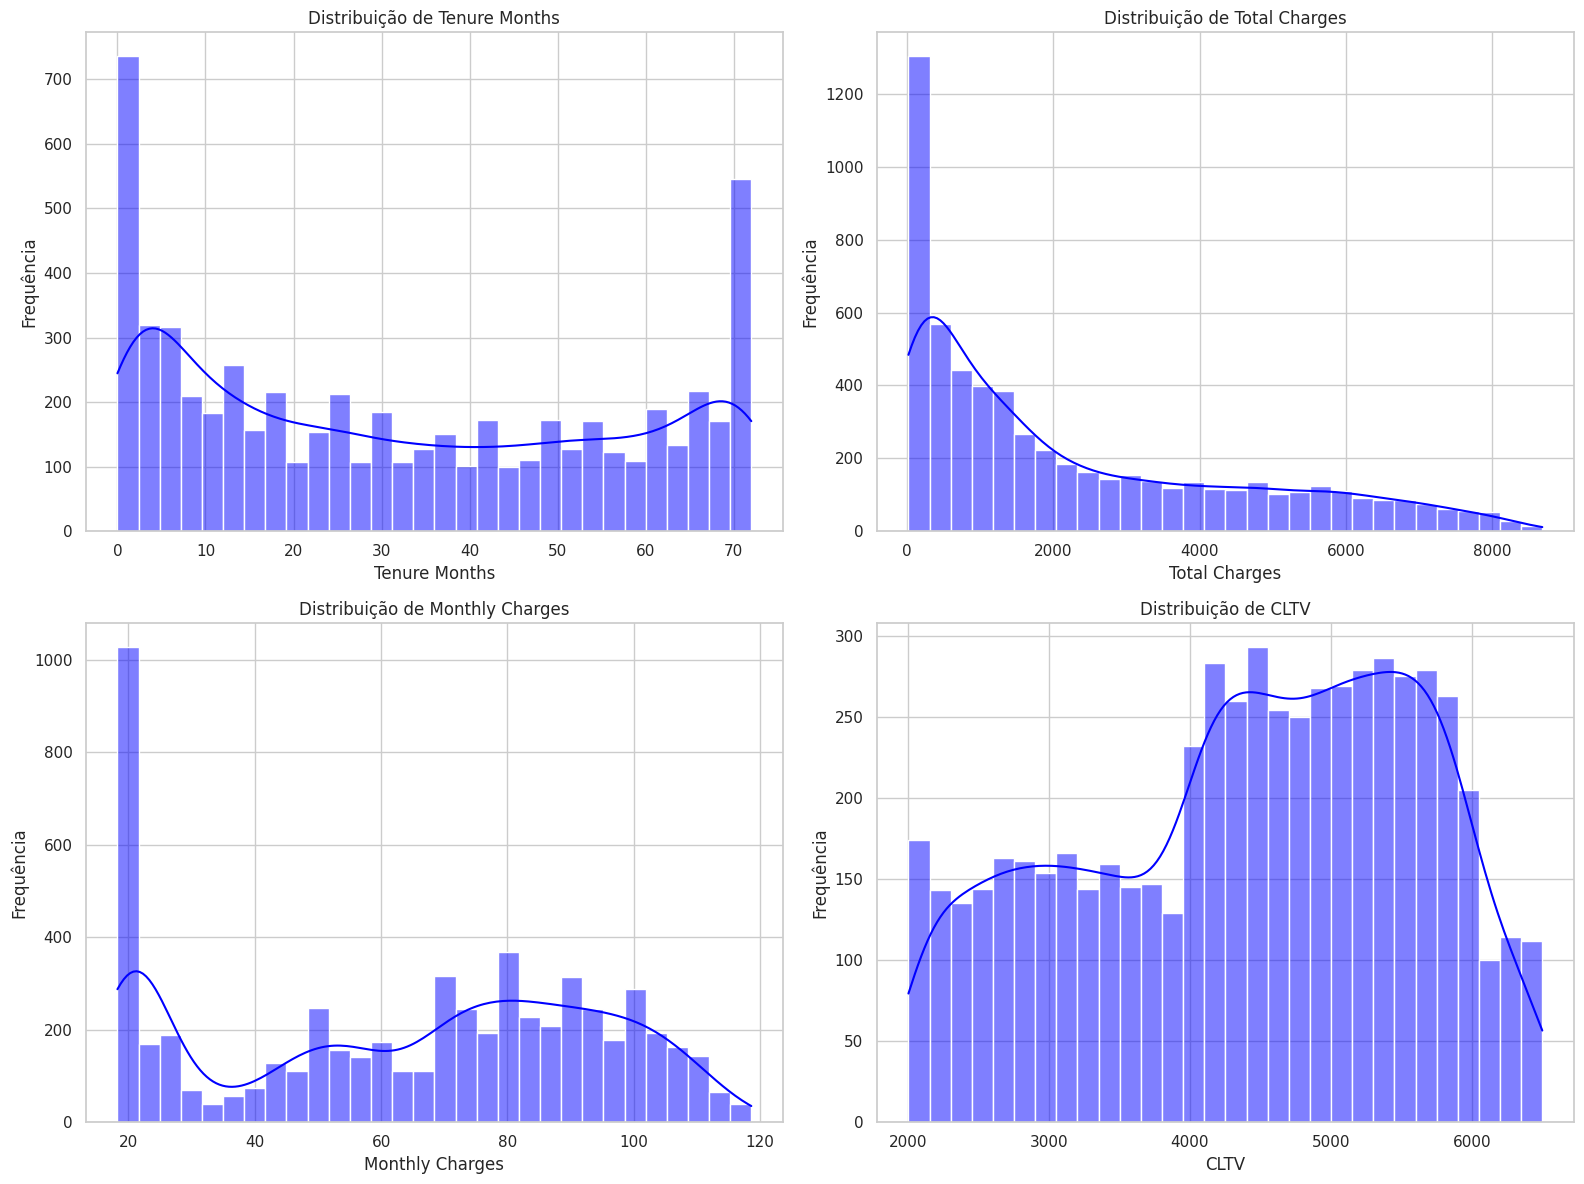

In [ ]:
#inicialmente, vamos verificar como estão distribuidos os dados ao longo dessas 4 colunas numericas
sns.set(style="whitegrid")
numeric_columns = ['Tenure Months', 'Total Charges' ,'Monthly Charges', 'CLTV']
plt.figure(figsize=(16, 12))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f'Distribuição de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


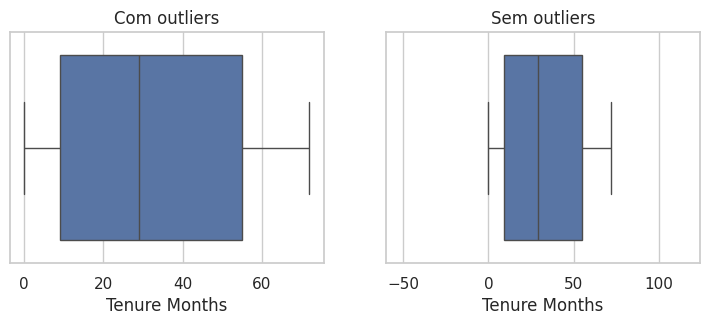

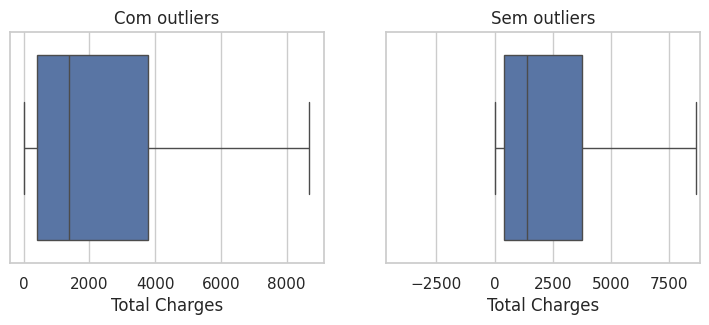

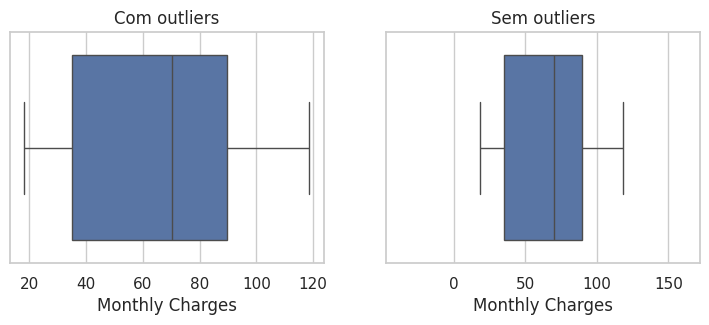

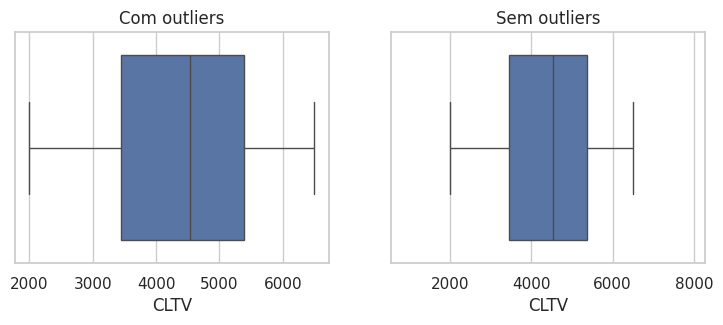

In [ ]:
#Verificando a existência de outliers
def percentile(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    inf_limit = q1 - (1.5 * IQR)
    sup_limit = q3 + (1.5 * IQR)
    return inf_limit, sup_limit

def exclude_outliers(df, column_name):
    lines_quantity = df.shape[0]
    inf_limit, sup_limit = percentile(df[column_name])
    df = df.loc[(df[column_name] >= inf_limit) & (df[column_name] <= sup_limit), :]
    removed_lines = lines_quantity - df.shape[0]
    return df, removed_lines


def box_plot(columns): # plotar o box plot (diagrama de caixa)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(8.9, 3)
    sns.boxplot(x=columns, ax=ax1)
    ax2.set_xlim(percentile(columns))
    sns.boxplot(x=columns, ax=ax2)

    ax1.title.set_text('Com outliers')
    ax2.title.set_text('Sem outliers')

box_plot(df['Tenure Months'])
box_plot(df['Total Charges'])
box_plot(df['Monthly Charges'])
box_plot(df['CLTV'])

Note- que, diferentemente como foi na primeira etapa, não há a existência de outliers significativos nos dados númericos. Haja vista que, os valores extremos encontram-se concentrados dentro do intervalo interquartil, indicando um baixo potencial de distorção na análise que será feita.


#Verificando as cidades com a taxa de churn mais elevada

In [ ]:
print(df['Country'].value_counts())
print(df['State'].value_counts())
print(df['City'].value_counts())

#analisando a distribuição das cidades
city_counts = df['City'].value_counts()
cities_with_min_responses = city_counts[city_counts > 10].index
print(cities_with_min_responses)
#filtrando o dataframe para conter apenas as cidades com mais de 10 respostas
filtered_df = df[df['City'].isin(cities_with_min_responses)]

#codificando a varíavel Churn Label
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Churn Label'] = label_encoder.fit_transform(df['Churn Label'])


print(df.info())
#verificando as cidades com maior Churn Label (dentro das cidades com maior recorrência de resposta (mais de 10 respostas))
city_churn_rates = filtered_df.groupby('City')['Churn Label'].mean().sort_values(ascending=False)
print("Churn rates for cities with more than 10 responses:")
print(city_churn_rates)


Country
United States    5986
Name: count, dtype: int64
State
California    5986
Name: count, dtype: int64
City
Los Angeles      270
San Diego        130
San Jose          94
San Francisco     91
Sacramento        90
                ... 
Santa Clarita      1
Crockett           1
Jamestown          1
Squaw Valley       1
Leggett            1
Name: count, Length: 1129, dtype: int64
Index(['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Sacramento',
       'Fresno', 'Long Beach', 'Oakland', 'Stockton', 'Glendale',
       'Bakersfield', 'Riverside', 'Whittier', 'Modesto', 'Anaheim',
       'Berkeley', 'Santa Barbara', 'Irvine', 'Pasadena', 'Burbank',
       'Inglewood', 'San Bernardino', 'Santa Rosa', 'Santa Monica',
       'Chula Vista', 'Corona', 'Garden Grove', 'Salinas', 'North Hollywood',
       'Orange', 'Rancho Cucamonga', 'Escondido', 'Van Nuys', 'Torrance',
       'Santa Ana', 'Palmdale', 'Fremont', 'Newport Beach', 'Moreno Valley',
       'Redwood City', 'El Cajon', 'Va

Note que, apesar de filtrar as cidades para apenas aquelas que apresentassem mais de 10 respostas, o resultado ainda ficou enviesado, haja vista que, algumas cidades apresentam uma taxa de churn alta porem pouca frequencia de resposta, apresentando uma desproporcionalidade na analise. Em virtude disso, serão considerados somente as 10 cidades com maior frequência.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Glendale'),
  Text(1, 0, 'Oakland'),
  Text(2, 0, 'Stockton'),
  Text(3, 0, 'Los Angeles'),
  Text(4, 0, 'San Diego'),
  Text(5, 0, 'San Jose'),
  Text(6, 0, 'San Francisco'),
  Text(7, 0, 'Fresno'),
  Text(8, 0, 'Long Beach'),
  Text(9, 0, 'Sacramento')])

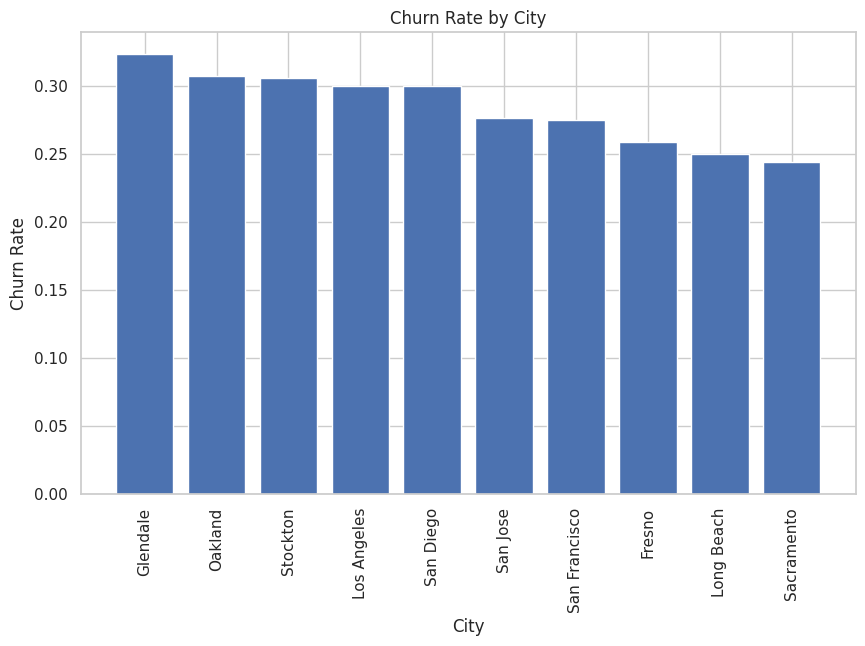

In [ ]:
#verificando as cidades com maior Churn Label entre as 10 cidades com maior frequência de resposta:
top_10_cities = cities_with_min_responses[:10]
top_10_city_churn_rates = filtered_df[filtered_df['City'].isin(top_10_cities)].groupby('City')['Churn Label'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(top_10_city_churn_rates.index, top_10_city_churn_rates.values)
plt.xlabel('City')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by City')
plt.xticks(rotation=90)

# Verificando o churn entre clientes antigos e recentes

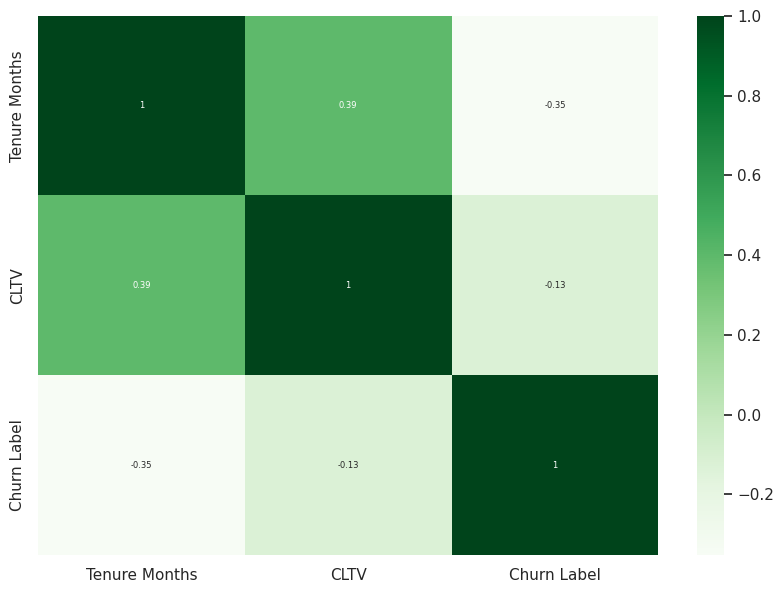

In [ ]:
#Para verificar a relação entre churn e clientes, é necessário olhar para duas varíaveis (Tenure months e CLTV)
corr_matrix = df[['Tenure Months', 'CLTV', 'Churn Label']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', annot_kws={"size": 6})
plt.show()


# Verificando o número de serviços utilizados

In [ ]:
print(df['Phone Service'].value_counts)
print(df['Multiple Lines'].value_counts)
print(df['Internet Service'].value_counts)
print(df['Online Security'].value_counts)
print(df['Online Backup'].value_counts)
print(df['Device Protection'].value_counts  )
print(df['Tech Support'].value_counts)
print(df['Streaming TV'].value_counts)
print(df['Streaming Movies'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
5981    Yes
5982    Yes
5983    Yes
5984    Yes
5985    Yes
Name: Phone Service, Length: 5986, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       No phone service
1                    Yes
2                    Yes
3                    Yes
4                    Yes
              ...       
5981                  No
5982                  No
5983                  No
5984                  No
5985                 Yes
Name: Multiple Lines, Length: 5986, dtype: object>
<bound method IndexOpsMixin.value_counts of 0               DSL
1               DSL
2                No
3               DSL
4       Fiber optic
           ...     
5981    Fiber optic
5982             No
5983             No
5984             No
5985    Fiber optic
Name: Internet Service, Length: 5986, dtype: object>
<bound method IndexOpsMixin.value_counts of 0                        No
1              

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5986 non-null   object 
 1   Count              5986 non-null   int64  
 2   Country            5986 non-null   object 
 3   State              5986 non-null   object 
 4   City               5986 non-null   object 
 5   Zip Code           5986 non-null   int64  
 6   Lat Long           5986 non-null   float64
 7   Latitude           5986 non-null   float64
 8   Longitude          5986 non-null   float64
 9   Gender             5986 non-null   object 
 10  Senior Citizen     5986 non-null   object 
 11  Partner            5986 non-null   object 
 12  Dependents         5986 non-null   object 
 13  Tenure Months      5986 non-null   int64  
 14  Phone Service      5986 non-null   int64  
 15  Multiple Lines     5986 non-null   int64  
 16  Internet Service   5986 

<ipython-input-11-5dc44879ec8b>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_counts.index, y=service_counts.values, palette='viridis',)


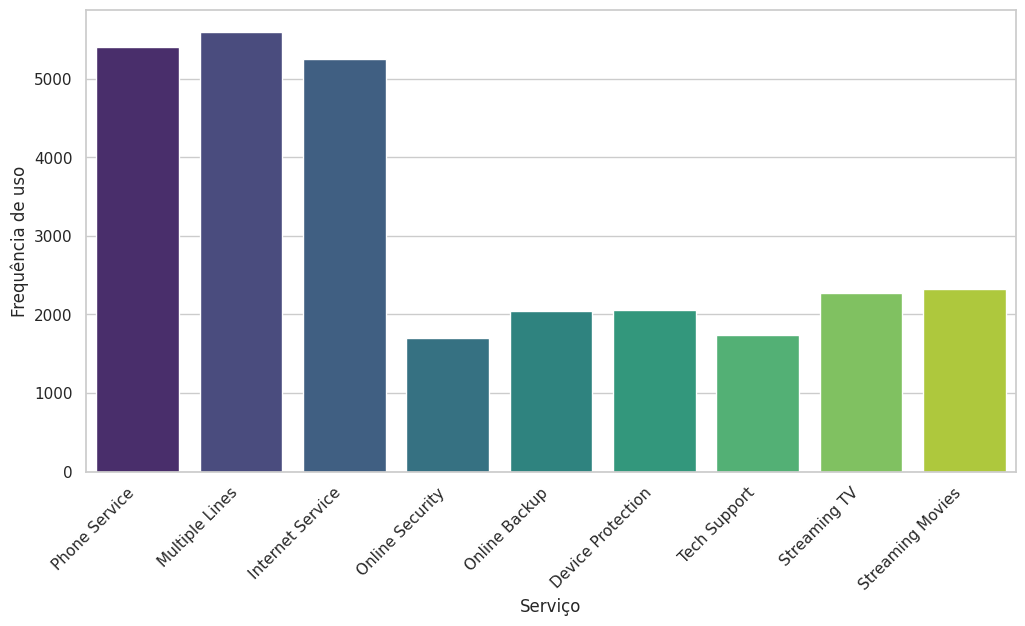

In [ ]:
#Substituindo "No internet service" por "no"
for columns in ['Phone Service', 'Multiple Lines', 'Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']:
    df[columns] = df[columns].replace('No internet service', 'No')


#para verificar os serviços mais e menos utilizados, sera necessário codificar suas colunas
label_encoder = LabelEncoder()
for column in ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']:
    df[column] = label_encoder.fit_transform(df[column])

print(df.info())
print(df.head())

#agora, vamos verificar a frequência de respostas em cada uma dessas colunas
service_counts = df[['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']].sum()
print(service_counts)

plt.figure(figsize=(12, 6))
sns.barplot(x=service_counts.index, y=service_counts.values, palette='viridis',)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Serviço')
plt.ylabel('Frequência de uso')
plt.title('')
plt.show()

#Pré processando e analisando as demais colunas que sobraram

In [ ]:
print(df['Gender'].value_counts)
print(df['Senior Citizen'].value_counts)
print(df['Partner'].value_counts)
print(df['Dependents'].value_counts)
print(df['Contract'].value_counts)
print(df['Paperless Billing'].value_counts)
print(df['Payment Method'].value_counts)


label_encoder = LabelEncoder()
for column in ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Paperless Billing', 'Contract']:
    df[column] = label_encoder.fit_transform(df[column])


for column in ['Payment Method']:
    df[column] = pd.Categorical(df[column], categories=["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"], ordered =True).codes
print(df.info())
print(df.head())


<bound method IndexOpsMixin.value_counts of 0       Female
1       Female
2         Male
3       Female
4       Female
         ...  
5981    Female
5982    Female
5983      Male
5984      Male
5985      Male
Name: Gender, Length: 5986, dtype: object>
<bound method IndexOpsMixin.value_counts of 0        No
1        No
2       Yes
3       Yes
4       Yes
       ... 
5981     No
5982     No
5983     No
5984     No
5985     No
Name: Senior Citizen, Length: 5986, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       Yes
1        No
2       Yes
3       Yes
4        No
       ... 
5981    Yes
5982     No
5983    Yes
5984    Yes
5985     No
Name: Partner, Length: 5986, dtype: object>
<bound method IndexOpsMixin.value_counts of 0        No
1        No
2       Yes
3        No
4        No
       ... 
5981    Yes
5982     No
5983    Yes
5984    Yes
5985     No
Name: Dependents, Length: 5986, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       Month-to-month
1       Mon

#Realizando o pré processamento na base de teste (seguindo os mesmos padrões da base de treino)

In [ ]:
df_teste = '/content/df_test.csv'
df_test = pd.read_csv(df_teste)
df_test.head()
display(df_test.info())

df_test.isna().sum()

#agora, vamos executar o mesmo procedimento de alterção de codificação realizado previamente na base de treino

#convertendo as colunas lat long e total charges para float
df_test["Total Charges"] = df_test["Total Charges"].replace(" ", np.nan)
df_test["Total Charges"] = df_test["Total Charges"].astype(np.float64)
df_test["Total Charges"] = df_test["Total Charges"].fillna(df_test["Total Charges"].mean())
df_test["Lat Long"] = df_test["Lat Long"].str.replace(" ", "")
df_test["Lat Long"] = df_test["Lat Long"].str.split(",").str[0].astype(np.float64)

#separando as colunas categoricas e numericas
categorical_columns = df_test.select_dtypes(include=['object']).drop(columns=['CustomerID']).columns


numeric_columns = df_test.select_dtypes(include=['int64', 'float64']).columns

#codificando as colunas categoricas em numericas usando label encoder

for columns in ['Phone Service', 'Multiple Lines', 'Internet Service','Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']:
    df_test[columns] = df_test[columns].replace('No internet service', 'No')


#para verificar os serviços mais e menos utilizados, sera necessário codificar suas colunas
label_encoder = LabelEncoder()
for column in ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']:
    df_test[column] = label_encoder.fit_transform(df_test[column])


for column in ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Paperless Billing', 'Contract']:
    df_test[column] = label_encoder.fit_transform(df_test[column])


for column in ['Payment Method']:
    df_test[column] = pd.Categorical(df_test[column], categories=["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"], ordered =True).codes


print(df_test.info())
print(df_test.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1057 non-null   object 
 1   Count              1057 non-null   int64  
 2   Country            1057 non-null   object 
 3   State              1057 non-null   object 
 4   City               1057 non-null   object 
 5   Zip Code           1057 non-null   int64  
 6   Lat Long           1057 non-null   object 
 7   Latitude           1057 non-null   float64
 8   Longitude          1057 non-null   float64
 9   Gender             1057 non-null   object 
 10  Senior Citizen     1057 non-null   object 
 11  Partner            1057 non-null   object 
 12  Dependents         1057 non-null   object 
 13  Tenure Months      1057 non-null   int64  
 14  Phone Service      1057 non-null   object 
 15  Multiple Lines     1057 non-null   object 
 16  Internet Service   1057 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057 entries, 0 to 1056
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1057 non-null   object 
 1   Count              1057 non-null   int64  
 2   Country            1057 non-null   object 
 3   State              1057 non-null   object 
 4   City               1057 non-null   object 
 5   Zip Code           1057 non-null   int64  
 6   Lat Long           1057 non-null   float64
 7   Latitude           1057 non-null   float64
 8   Longitude          1057 non-null   float64
 9   Gender             1057 non-null   int64  
 10  Senior Citizen     1057 non-null   int64  
 11  Partner            1057 non-null   int64  
 12  Dependents         1057 non-null   int64  
 13  Tenure Months      1057 non-null   int64  
 14  Phone Service      1057 non-null   int64  
 15  Multiple Lines     1057 non-null   int64  
 16  Internet Service   1057 

#Treinamento e validação da Árvore de decisao e da Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = df.drop(columns=['CustomerID', 'Churn Label', 'Country', 'State', 'City'])
y = df['Churn Label']
df_test_size = df_test.shape[0]
# Dividindo o conjunto de dados em treino e validação
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=df_test_size, random_state=42)

# Conjunto de teste
x_test = df_test.drop(columns=['CustomerID', 'Country', 'State', 'City'])


# Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

y_pred_train = clf.predict(x_train)
train_score = f1_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)


y_pred_val = clf.predict(x_val)
val_score = f1_score(y_val, y_pred_val)
val_precision = precision_score(y_val, y_pred_val)

y_pred_test = clf.predict(x_test)


print("Decision Tree - F1 na base de treino:", train_score)
print("Decision Tree - Precision na base de treino:", train_precision)
print("Decision Tree - F1 na base de validação:", val_score)
print("Decision Tree - Precision na base de validação:", val_precision)

# Random Forest
r_clf = RandomForestClassifier(random_state=42)
r_clf.fit(x_train, y_train)


y_pred_train_rf = r_clf.predict(x_train)
train_score_rf = f1_score(y_train, y_pred_train_rf)
train_precision_rf = precision_score(y_train, y_pred_train_rf)


y_pred_val_rf = r_clf.predict(x_val)
val_score_rf = f1_score(y_val, y_pred_val_rf)
val_precision_rf = precision_score(y_val, y_pred_val_rf)


y_pred_test_rf = r_clf.predict(x_test)


print("Random Forest - F1 na base de treino:", train_score_rf)
print("Random Forest - Precision na base de treino:", train_precision_rf)
print("Random Forest - F1 na base de validação:", val_score_rf)
print("Random Forest - Precision na base de validação:", val_precision_rf)


Decision Tree - F1 na base de treino: 1.0
Decision Tree - Precision na base de treino: 1.0
Decision Tree - F1 na base de validação: 0.5097345132743363
Decision Tree - Precision na base de validação: 0.4982698961937716
Random Forest - F1 na base de treino: 1.0
Random Forest - Precision na base de treino: 1.0
Random Forest - F1 na base de validação: 0.5684210526315789
Random Forest - Precision na base de validação: 0.678391959798995


# Usando a validação cruzada para avaliar a performance do modelo após a aplicação do PCA

In [ ]:
x = df.drop(columns=['CustomerID', 'Churn Label', 'Country', 'State', 'City'])
y = df['Churn Label']
x_test = df_test.drop(columns=['CustomerID', 'Country', 'State', 'City'])

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_test_scaled = scaler.fit_transform(x_test)
pca = PCA()
x_pca = pca.fit_transform(x_scaled)
x_test_pca = pca.fit_transform(x_test_scaled)

# Dividindo o conjunto de dados em treino e validação
x_train_pca, x_val_pca, y_train, y_val = train_test_split(x_pca, y, test_size=df_test_size, random_state=42)

# Decision Tree com PCA
clf_pca = DecisionTreeClassifier(random_state=42)
clf_pca.fit(x_train_pca, y_train)


y_pred_train_pca = clf_pca.predict(x_train_pca)
train_score_pca = f1_score(y_train, y_pred_train_pca)
cross_val_score_pca = cross_val_score(clf_pca, x_train_pca, y_train, cv=10, scoring='f1').mean()

y_pred_test_pca = clf_pca.predict(x_test_pca)


print("Decision Tree com PCA - F1 na base de treino:", train_score_pca)
print("Decision Tree com PCA - F1 com validação cruzada:", cross_val_score_pca)


# Random Forest com PCA
clf_pca_rf = RandomForestClassifier(random_state=42)
clf_pca_rf.fit(x_train_pca, y_train)


y_pred_train_pca_rf = clf_pca_rf.predict(x_train_pca)
train_score_pca_rf = f1_score(y_train, y_pred_train_pca_rf)
cross_val_score_pca_rf = cross_val_score(clf_pca_rf, x_train_pca, y_train, cv=5, scoring='f1').mean()


y_pred_test_pca_rf = clf_pca_rf.predict(x_test_pca)


print("Random Forest com PCA - F1 na base de treino:", train_score_pca_rf)
print("Random Forest com PCA - F1 com validação cruzada:", cross_val_score_pca_rf)


Decision Tree com PCA - F1 na base de treino: 1.0
Decision Tree com PCA - F1 com validação cruzada: 0.4817422156570381
Random Forest com PCA - F1 na base de treino: 1.0
Random Forest com PCA - F1 com validação cruzada: 0.5527660734565127


# Ajustando os hiperparâmetros ideais

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':["gini","entropy"],
'max_depth': [2, 3, 4, 5],
'min_samples_leaf': [10, 20, 30],
'min_samples_split': [20, 30, 40]}

x_train = df.drop(columns=['CustomerID', 'Churn Label', 'Country', 'State', 'City'])
y_train = df['Churn Label']


clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)


rf_clf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_clf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search_rf.fit(x_train, y_train)

print("Best hyperparameters for Random Forest: ", grid_search_rf.best_params_)


Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 20}
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters for Random Forest:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20}


# Validação com ajuste de hiperparâmetros

In [ ]:
x = df.drop(columns=['CustomerID', 'Churn Label', 'Country', 'State', 'City'])
y = df['Churn Label']

# Dividindo o conjunto de dados em treino e validação
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=df_test_size, random_state=42)

# Conjunto de teste
x_test = df_test.drop(columns=['CustomerID', 'Country', 'State', 'City'])


# Decision Tree
clf = DecisionTreeClassifier(criterion = 'gini', max_depth=5,min_samples_leaf=10,min_samples_split=20,random_state=42)
clf.fit(x_train, y_train)


y_pred_train = clf.predict(x_train)
train_score = f1_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)


y_pred_val = clf.predict(x_val)
val_score = f1_score(y_val, y_pred_val)
val_precision = precision_score(y_val, y_pred_val)


y_pred_test_hyp = clf.predict(x_test)




print("Decision Tree - F1 na base de treino:", train_score)
print("Decision Tree - Precision na base de treino:", train_precision)
print("Decision Tree - F1 na base de validação:", val_score)
print("Decision Tree - Precision na base de validação:", val_precision)


# Random Forest
r_clf = RandomForestClassifier(criterion ='entropy', max_depth=5,min_samples_leaf=30,min_samples_split=20,random_state=42)
r_clf.fit(x_train, y_train)


y_pred_train_rf = r_clf.predict(x_train)
train_score_rf = f1_score(y_train, y_pred_train_rf)
train_precision_rf = precision_score(y_train, y_pred_train_rf)


y_pred_val_rf = r_clf.predict(x_val)
val_score_rf = f1_score(y_val, y_pred_val_rf)
val_precision_rf = precision_score(y_val, y_pred_val_rf)


y_pred_test_rf_hyp = r_clf.predict(x_test)



print("Random Forest - F1 na base de treino:", train_score_rf)
print("Random Forest - Precision na base de treino:", train_precision_rf)
print("Random Forest - F1 na base de validação:", val_score_rf)
print("Random Forest - Precision na base de validação:", val_precision_rf)



Decision Tree - F1 na base de treino: 0.5248953001395998
Decision Tree - Precision na base de treino: 0.6650943396226415
Decision Tree - F1 na base de validação: 0.5272331154684096
Decision Tree - Precision na base de validação: 0.6612021857923497
Random Forest - F1 na base de treino: 0.5383502170767005
Random Forest - Precision na base de treino: 0.7227979274611399
Random Forest - F1 na base de validação: 0.5416666666666667
Random Forest - Precision na base de validação: 0.75


# Exportando o resultado da previsão inicial (melhor performance)

In [ ]:
results_df = pd.DataFrame({
    "CustomerID":df_test['CustomerID'],
    "Churn Label":y_pred_test_rf
    })

results_df["Churn Label"] = results_df["Churn Label"].map({0: "No", 1: "Yes"})
results_df.to_csv("results.csv", index=False)


#Respostas das questões
1. Realize uma análise exploratória dos dados e responda às seguintes questões: existe
alguma cidade com taxa de churn significativamente maior? O churn é mais prevalente
entre clientes recentes ou antigos? Quais serviços são menos utilizados?
2. Compare os resultados obtidos entre uma árvore de decisão e uma floresta aleatória
em termos de precisão na classificação de churn de clientes. Avalie também outras
métricas relevantes, como recall e F1-score, para entender melhor a eficácia de cada
modelo na previsão de churn.
3. Demonstre o uso da validação cruzada para avaliar o desempenho de um modelo de
machine learning. Inclua uma descrição dos tipos comuns de validação cruzada e como
cada um pode ser aplicado para melhorar a generalização do modelo.
4. Como a aplicação de técnicas de redução de dimensionalidade, como PCA (Análise de
Componentes Principais), afeta o desempenho dos modelos de predição de churn?

1) Antes de aplicar os modelos, foi necessário realizar uma análise exploratória dos dados com o intuito de verificar e compreender melhor a estrutura e as relações entre os dados presentes nas bases. Inicialmente, verificou-se a as colunas e seus respectivos tipos de dados; bem como se havia a presença de algum valor nulo (o que acarretaria em uma necessidade de imputação). Como não possuiam valores faltantes, até essa instância, já foi possível começar a analíse exploratória.

Em primeiro plano, as colunas foram separadas em categóricas e númericas (essa organização facilitaria posteriormente nos processos de codificação), parte desse processo foi a conversão das colunas "Total Charges" e "Lat Long" para valores númericos (note que, ao longo da conversão da coluna "Lat Long" alguns valores foram perdidos, sendo realizada a imputação nos espaços vagos atráves da média dos valores existentes).

Em segundo plano, foi verificada a distribuição de indíviduos na base de teste da nossa varíavel target. Notou-se que a grande maioria da amostra não estava suscetível a desistir do serviço, para além disso, foram verificadas as distribuições nas colunas númericas (Tenure months, Total charges, CLTV e Monthly charges). Aqui destacam-se o comportamento das colunas relacionadas ao número de meses que o cliente está com a empresa e a do (CLTV). De fato, o grande número de clientes com score alto pode ter correlação com o alto número de clientes que não estão dispostos a abrir mão dos serviços da empresa. Contudo, a grande concentração de indíviduos que ou aderiram recentemente aos serviços ou já são clientes antigos é algo a se obervar posteriormente quando for a realizada a correlação entre essas varíaveis.

Continuando os processos, utilizou-se o IQM nas colunas númericas para verificar se havia alguma outlier a ser removida. Como não foram encontradas, prosseguimos o pré processamento verificando, agora, quais cidades possuiam a taxa de churn mais elevada. Aqui, foi necessário eliminar algumas cidades em virtude da ambiguidade de resultados relacionada diretamente com a baixa amostra do local; por exemplo: existiam cidades que apareceram na amostra com menos de 10 respostas, o que muitas vezes poderia implicar em uma alta ou baixa taxa, atrapalhando a analíse. Posto isso, foi verificada a distribuição da taxa de churn nas 10 principais cidades, notando que, de fato, não havia uma diferença grande entre as taxas nesses grandes centros da california, não existindo uma cidade com a taxa de churn relativamente maior.

Para analisar a correlação entre o churn e clientes antigos ou novos, foi necessário codificar a váriavel churn label (utilizando o labelencoder()) e observar a correlação dela com as outras 2 colunas relacionadas ao comportamento desses indíviduos. Notou-se que, quanto maior o tempo de aderência do cliente ao serviço, menor a chance dele cancelar e maior o score CLTV dele. Logo, por consequência, quanto maior for o seu score, menor a chance do cliente cancelar o contrato. Portanto, o churn tende a ser mais frequentes em clientes novos.

Por fim, verificou-se quais eram os serviços mais utilizados. Para isso, codificou-se as colunas que diziam respeito a eles (realizando uma pequena substituição antes, substituindo o "No internet service" por "No") e verificou-se que os serviços mais utilizados são os relacionados a linhas telefônicas ("Phone service" e "Multiple Lines") e o serviço relacionado a internet "Internet Service". Por outro lado, os serviços menos utilizados são o "Tech Support" e "Online Security".


2) Após realizar o pré processamento na base de treino e de teste, iniciou-se o treinamento e validação dos modelos de previsão do churn label. Foram treinadas uma árvore de decisão e uma random forest. Inicialmente, nesta etapa, os modelos não foram postos a outras técnicas de avaliação e refinamento do resultado. Nota-se que, a random forest apresentou-se mais precisa e acurada do que a árvore de decisão neste processo, apresentando os seguintes resultados:

Decision Tree - F1 na base de validação: 0.5097345132743363

Decision Tree - Precision na base de validação: 0.4982698961937716

Random Forest - F1 na base de treino: 1.0

Random Forest - Precision na base de treino: 1.0

Random Forest - F1 na base de validação: 0.5684210526315789

Random Forest - Precision na base de validação: 0.678391959798995



3)Cross-Validation (validação cruzada) é uma métrica que permite avaliar o desempenho de modelos de machine learning quando estes estão sob situação de generalização, ou seja, perante dados não vistos anteriormente. A validação cruzada consiste em dividir o conjunto de dados em folds (partições) sendo uma parte do conjunto utilizada para treino e a outra utilizada para teste. Existem diferentes tecnícas de cross-validation, onde cada uma se ajusta a necessidade de avaliação. Abaixo, serão citados 3 tipos de validação cruzada:

1- Holdout validation: Adequado para quando se necessita de um treinamento rapido do modelo, esse metódo de validação cruzada consiste em realizar o treinamento somente com 50% do dataset, deixando a outra metade em "stand-by". De maneira clara, o problema com este metódo é o possível descarte de informações importantes, que podem estar contidas na metade "ignorada'.

2-K-fold Cross Validation: Neste metódo, o dataset é divido em k-folds onde o treinamento é realizado em k-1 folds e validado no subset restante (se k = 10, o modelo é treinado em 9 subsets e validado em 1 subset), esse processo é realizado k-vezes, onde a métrica de avaliação será o resultado das médias de cada iteração.

3- Stratified K-fold Cross-Validation: Visto como uma adaptação do último processo a problemas que lidam com a classificação em classes desbalanceadas, a unica diferença agora é que a distribuição original de classes é mantida, garantindo que cada fold tenha a mesma proporção.

4)Neste cenário, a utilização do PCA nas categorias normalizadas (utilizando o standardscaler) não surtiu efeitos significativos na performance dos dois modelos. Perante isso, os modelos foram submetidos ao ajuste de hiperparametros para verificar se essa alteração acarretaria em alterações significativas na performance, o que também não ocorreu perante os modelos de classificação. Tal resultado pode ser atribuido a problemas no pré processamento dos dados, acarretando em um pequeno impacto dessas tecnícas no resultado final do modelo, haja vista que, a melhor performance de um modelo de previsão, nesse caso, foi a Random Forest inicial.


